<a href="https://colab.research.google.com/github/partizanos/multimedia_security/blob/master/TP2_mutimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 Dimitris Proios

## Encryption
This exercise will show a fundamental difference between classical cryptography techniques and (robust)
watermarking.
Exercise 1
### 1. Read in the image liftingbody.png


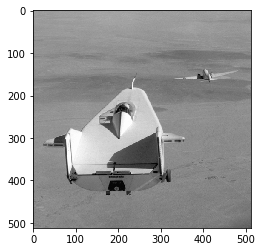

In [1]:
import matplotlib.image as mpimg; import matplotlib.pyplot as plt; import numpy as np; import requests; from PIL import Image; from io import BytesIO; import math; from skimage import data
img = np.array(Image.open(BytesIO(requests.get("https://raw.githubusercontent.com/partizanos/multimedia_security/master/tp4/liftingbody.png").content)))
plt.imshow(img, cmap="gray")

### 2. Make a permutation matrix that will map each pixel of the source image to a new 2D position. Store this matrix and use it to permute the input image to a new (permuted) output image. Show both on the screen.


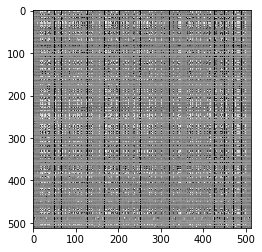

In [5]:
def perm(img):
  M, N = img.shape
  arrM = np.random.permutation(M)
  arrN = np.random.permutation(N)

  new_img = np.zeros((M,N))
  for i in range(M):
    for j in range(N):
      new_img[i,j] = img[arrM[i],arrN[j]]
  return new_img

plt.imshow(perm(img), "gray")


### 3. Determine and show the histograms of both the original source image and the permuted image. Explain the results.
** Answer** They are identical since the chanel values are same just in different positions

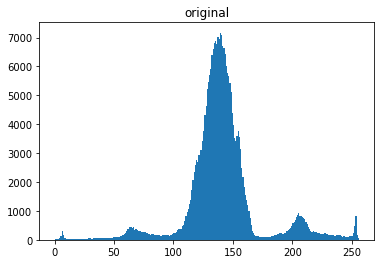

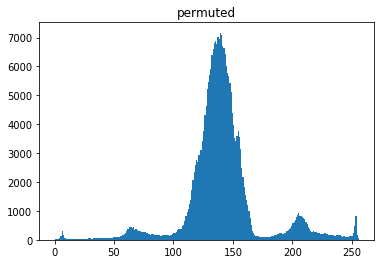

In [3]:
plt.hist(img.ravel(),256,[0,256]); plt.title("original"); plt.show()
plt.hist(new_img.ravel(),256,[0,256]); plt.title("permuted"); plt.show()


## Exercise 2
### Write a function that models block loss to an image in transmission. Your function should take an input image and set a random [N × M ] block of the image to zero. See Figure 1

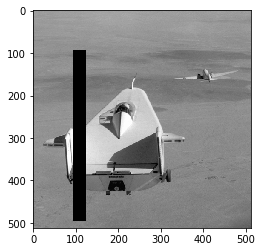

In [4]:


def loss_function (X, N, M):
  seed = int(np.random.random()*255)
  while M-seed<0 and N-seed<0:
    seed = int(np.random.random()*255)
  X[seed:seed+M, seed:seed+N] = 0
  return X 
plt.imshow(loss_function (img, 30, 400), "gray")

## Exercise 3
### 1. Read in the source image liftingbody.png
### 2. Make a permuted version using your permutation matrix
### 3. Take the permuted image and distorted using the block-loss function.
### 4. Permute the image back to the original and explain the result.

**Answer**

We can observe that the distortion spread across the whole image.

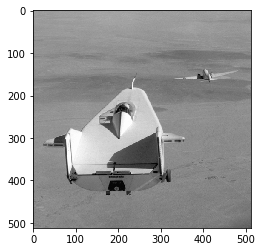

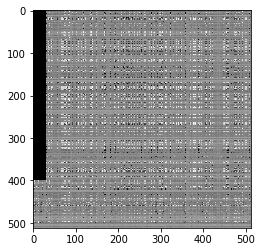

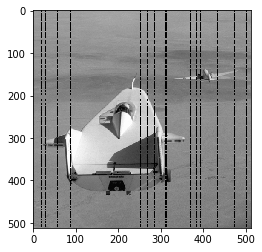

In [13]:
img = np.array(Image.open(BytesIO(requests.get("https://raw.githubusercontent.com/partizanos/multimedia_security/master/tp4/liftingbody.png").content)))

def perm(img):
  M, N = img.shape
  arrM = np.random.permutation(M)
  arrN = np.random.permutation(N)

  new_img = np.zeros((M,N))
  for i in range(M):
    for j in range(N):
      new_img[i,j] = img[arrM[i],arrN[j]]
  return new_img, arrM, arrN

new_img, arrM, arrN = perm(img)
new_img = loss_function (new_img, 30, 400)


def unperm(img, arrM, arrN):
  new_img = np.zeros((M,N))
  for i in range(len(arrM)):
    for j in range(len(arrN)):
      new_img[arrM[i],arrN[j]] = img[i,j]
  return new_img, arrM, arrN

unperm_img, arrM, arrN = unperm(new_img, arrM, arrN)

plt.imshow(img, "gray"); plt.show()
plt.imshow(new_img, "gray"); plt.show()
plt.imshow(unperm_img, "gray"); plt.show()

## Exercise 4
1. Read in the source image liftingbody.png
2. Generate a new noisy image whose values {−1, 1} are uniformly distributed
3. Add the noisy image to the original source image.
4. Display both images and their histograms. Explain what you see.
5. Repeat the step with new noisy images with values {−5, 5}, {−10, 10} and {−15, 15}
6. Add these 3 noisy images to the original image individually and determine the PSNR value each
time. Plot all PSNR value vs. noise value and explain the result

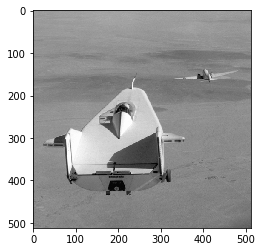

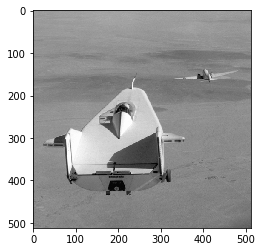

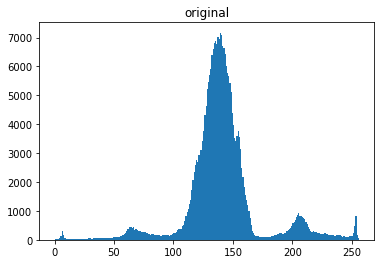

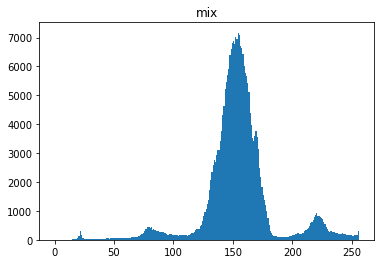

In [56]:
#1 
img = np.array(Image.open(BytesIO(requests.get("https://raw.githubusercontent.com/partizanos/multimedia_security/master/tp4/liftingbody.png").content)))
#2 
def distort(img, low, high, draw=False):
  M,N = img.shape
  noisy = np.random.choice(2,  M*N).tolist()
  noisy = np.array([low if i == 0 else i for high in noisy ])
  noisy = noisy.reshape((M,N))
  #3 
  mix = noisy + img 
  plt.imshow(mix, "gray"); plt.show('mix'); plt.show();
  plt.imshow(img, "gray"); plt.show('original'); plt.show();
  plt.hist(img.ravel(),256,[0,256]); plt.title("original"); plt.show()
  plt.hist(mix.ravel(),256,[0,256]); plt.title("mix"); plt.show()
  

distort(img, -1, 1, True)